# Grad stats 2 problem set 1

### 1. Set your current directory and download Charlie's dataset or your own data set using the "copy" command followed by "import delimited" or "use" depending on the format of your data [5 points]

In [2]:
cd "C:\Users\Hyunsu\Desktop\UCM\10. Spring 2020\(SOC 211) Graduate Statistics 2 (TA)\Probelm Sets"

C:\Users\Hyunsu\Desktop\UCM\10. Spring 2020\(SOC 211) Graduate Statistics 2 (TA)\Probelm Sets


In [3]:
set more off

In [ ]:
log using "Problem set #1_Oh.log", replace

(note: file C:\Users\Hyunsu\Desktop\UCM\10. Spring 2020\(SOC 211) Graduate Statistics 2 (TA)\Probelm Sets\Problem set #1_Oh.log not found)
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
      name:  <unnamed>
       log:  C:\Users\Hyunsu\Desktop\UCM\10. Spring 2020\(SOC 211) Graduate Statistics 2 (TA)\Probelm Sets\Problem set #1_Oh.log
  log type:  text
 opened on:  16 Feb 2020, 11:57:58


In [1]:
copy "https://raw.githubusercontent.com/charlieeatonphd/agilepredators/master/agilepredatorsdata20191116.csv" agilepredatorsdata20191116.csv

In [1]:
import delimited using "agilepredatorsdata20191116.csv", clear

(52 vars, 205,262 obs)


### 2. list all of the variable names in the dataset using the "ds" command with the appropriate varwidth specification [1 point]

In [2]:
ds, varwidth(20)

unitid                idx_sfa               ipo                   grtotltchrt2yr        pe_ind                grad_rate_150_p2yr_w  pctchrtgrbkaat_w      pct2yrchrtgrwhitt_w   not_pe_po             dist_white_share_w    poswitcherall
year                  idx_gr                owner_pe              grtotltallgradchrt    po_ind                grad_rate_150_p4yr_w  pctchrtgrwhitt_w      pct4yrchrtgrbkaat_w   peacqu                dist_hisp_share_w     poswitchsystemall
iclevel               selective             online                all_under             inst_name_new         all_under_w           pctchrtgrhispt_w      pct4yrchrtgrhispt_w   poacqu                dist_fed_grant_pct_w
idx_ef                systemid              total_enrollment      chain                 loan_amount_borrow~w  tuitionall_c_w        pct2yrchrtgrbkaat_w   pct4yrchrtgrwhitt_w   dist_pell_s           peswitcherall
idx_f                 systemnm              grtotltchrt4yr        investevent           grad_rate

### 3. Use the help magic to print the help documenation for the **"sum"** command. If you need information on the help magic, see here: https://nbviewer.jupyter.org/github/kylebarron/stata_kernel/blob/master/examples/Example.ipynb [1 pt]

In [3]:
%help sum

<!-- END HEAD --> +----------------------------------------+ | See | For the | |-----------------+----------------------| | | | | help summarize | summarize command | | | | | help sum() | sum() function | | | | +----------------------------------------+ <!-- BEGIN FOOT -->


### 4. Use the **"drop"** command with an **if statement** to drop schools if they are **state**, **community**, or **non-proft** in the **owner_pe** variable. Use the "keep" command and an if statement to only keep observations if the year is 2014, then use the summarize command with the **"detail"** specification to summarize the variable **"dist_pell_s"**. This variable measures a school's Pell Grant revenue per student. If you are working with your own data, use the **drop, keep, and summarize** commands to narrow your dataset in some systematic way and summarize an **interval ratio** variable. [5 pts]

In [4]:
tab owner_pe, nol m


       owner_pe |      Freq.     Percent        Cum.
----------------+-----------------------------------
      Community |     41,264       20.10       20.10
     Non-profit |     66,188       32.25       52.35
 Private equity |      6,799        3.31       55.66
 Privately held |     59,220       28.85       84.51
Publicly traded |     11,559        5.63       90.14
          State |     20,232        9.86      100.00
----------------+-----------------------------------
          Total |    205,262      100.00


In [5]:
drop if owner_pe == "State" | owner_pe == "Community" | owner_pe == "Non-profit"
  tab owner_pe


(127,684 observations deleted)


       owner_pe |      Freq.     Percent        Cum.
----------------+-----------------------------------
 Private equity |      6,799        8.76        8.76
 Privately held |     59,220       76.34       85.10
Publicly traded |     11,559       14.90      100.00
----------------+-----------------------------------
          Total |     77,578      100.00


In [6]:
keep if year==2014

(73,937 observations deleted)


In [7]:
sum dist_pell_s, d


                         dist_pell_s
-------------------------------------------------------------
      Percentiles      Smallest
 1%            0              0
 5%     1527.947              0
10%     2359.255              0       Obs               3,318
25%     3344.478              0       Sum of Wgt.       3,318

50%     4332.054                      Mean            5125.71
                        Largest       Std. Dev.      3526.453
75%     5597.208       17901.14
90%     8209.691       17901.14       Variance       1.24e+07
95%      14850.2       17901.14       Skewness        2.27957
99%     17901.14       17901.14       Kurtosis       8.685116


### 5. Create 1) a histogram and 2) a boxplot to visualize the distribution of Pell Grant revenue (or an interval ratio variable from your own dataset) in the following code cell. Then interpret the distributions in this markdown cell [3 pts]

(bin=35, start=0, width=511.46116)


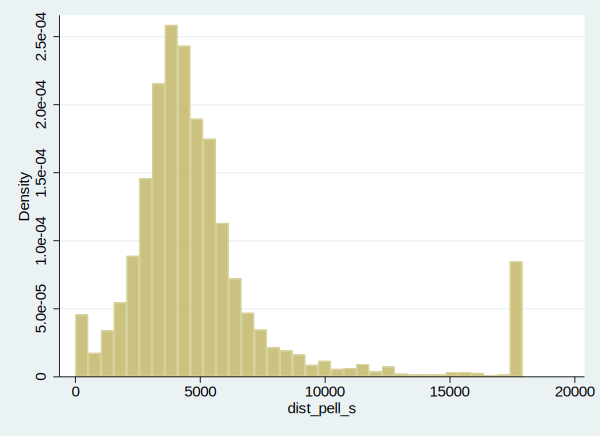

In [8]:
hist dist_pell_s

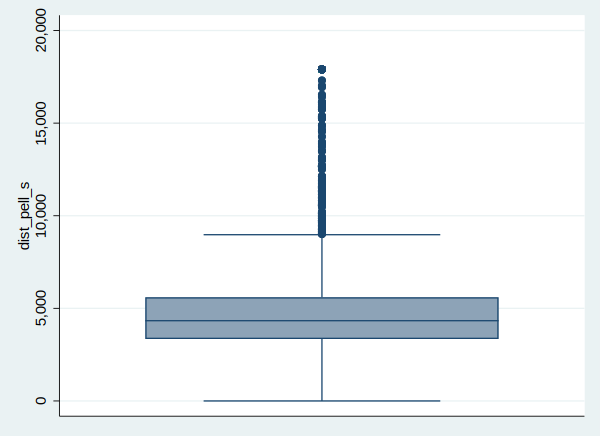

In [9]:
graph box dist_pell_s

### 6. Students at for-profit colleges have especially poor graduation rates at 4-year degree schools. In Eaton(2020) and Eaton, Howell, & Yannelis (2019), I've argued argued that for-profit colleges are more predatory under publicly traded and private equity ownership. Based on this theory, write a hypothesis about the relationship between whether a school offers 4-year or lower degrees and for-profit college ownership. Explain what is the independent variable and dependent variable and why? If you are working with your own data, do the same for a relationship between two **nominal** variables in your data. [4 pts]

1. Hypothesis: Higher level degrees are more likely to be offered is a school is under publicly traded or private equity ownership.
2. Dependent variable is level of degree. Independent variable is ownership.
3. Why: I expect variation in the dependent variable (degree level) to be caused by variation in the independent variable (ownership)
4. Why I expect this relationship: because longer degrees let schools with predatory ownership extract tuition revenue from each student for longer periods of time, and they don't compete with community colleges which have lower tuition.

### 7. Create a frequency table for colleges by their **level of degree offerings (iclevel)** and **ownership form (owner_pe)**. Make sure the dependent variable is listed first, making its values the row values. Stata doesn't like string variables, so use the commande **encode** with the **gen** specification to create encoded **iclevel2** and **owner_pe2** variables to use. If you are working with your own data, do the same for the two variables you hypothesized about. [3 pts]

In [10]:
encode iclevel, gen(iclevel2)
encode owner_pe, gen(owner_pe2)
  des iclevel2 owner_pe2





              storage   display    value
variable name   type    format     label      variable label
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
iclevel2        long    %35.0g     iclevel2   
owner_pe2       long    %15.0g     owner_pe2
                                              


In [11]:
recode iclevel2 (1=2 "2-4 years") (2=3 "4 or more years") (3=1 "Less than 2 years"), gen(level)
recode owner_pe2 (1=2 "Priv Equ") (2=1 "Priv Held") (3=3 "Pub Traded"), gen(owner_pe3)
tab level owner_pe3, column chi


(3641 differences between iclevel2 and level)

(2719 differences between owner_pe2 and owner_pe3)


+-------------------+
| Key               |
|-------------------|
|     frequency     |
| column percentage |
+-------------------+

        RECODE of |       RECODE of owner_pe2
         iclevel2 | Priv Held   Priv Equ  Pub Trade |     Total
------------------+---------------------------------+----------
Less than 2 years |     1,364        232        195 |     1,791 
                  |     62.94      42.03      21.15 |     49.19 
------------------+---------------------------------+----------
        2-4 years |       612        216        232 |     1,060 
                  |     28.24      39.13      25.16 |     29.11 
------------------+---------------------------------+----------
  4 or more years |       191        104        495 |       790 
                  |      8.81      18.84      53.69 |     21.70 
------------------+---------------------------------+----------
          

### 7. Create a horizontal bar graph using the **graph hbar** command with the **over** specification to plot the percentage of schools with degree levels within each ownership form. Use the **xi** command with the **noomit** option to create a dummy variable for iclevel. Do the same with your variables of interest if you are using your own data. [3 pts]

In [12]:
xi i.level, noomit

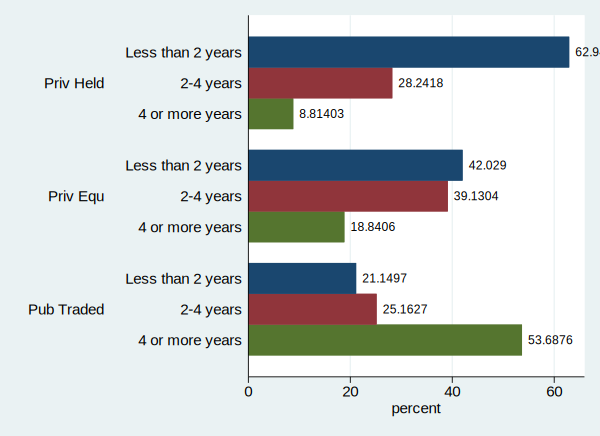

In [13]:
graph hbar _Ilevel_*, over(owner_pe3) label percentages legend(off) blabel(bar) showyvars yvaroptions(relabel(1 "Less than 2 years" 2 "2-4 years" 3 "4 or more years"))

### 8. Provide your interpretation of the results from the bivariate frequency table and the bar graph. Is there a relationship between ownership form and offering higher degrees? Or in your own variables if using your own data? What is the relationship in your own words, and does it fit your hypothesis?

There is an association between ownership form and offering higher degrees. 

Higher level degrees are offered more by publicly traded schools and private equity schools than privately held schools.

### 9. Private equity and publicly traded ownership may lead to more predation. But privately held colleges can be predatory too. Within each ownership form, those colleges that are operated by chains may also be more likely to be predatory. Use the **chain** variable to generate another set of bivariate tables and bargraphs for **degree level (iclevel)** and **chain ownership** and for **chain ownership (chain)** and **ownership form (owner_pe)**. Do the same if you think there is another intervening variable in your own data. Then report your interpretation [5 pts]

[record your interpretation here]
Chain status is an intervening variable because degree level offered is effected by chain status and chain status is effected by ownership

In [14]:
tab chain


      chain |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |      1,754       48.17       48.17
          1 |      1,887       51.83      100.00
------------+-----------------------------------
      Total |      3,641      100.00


In [15]:
  label define chain 0 "Not chain" 1 "chain"
  label values chain chain

In [16]:
tab level chain, column chi


+-------------------+
| Key               |
|-------------------|
|     frequency     |
| column percentage |
+-------------------+

        RECODE of |         chain
         iclevel2 | Not chain      chain |     Total
------------------+----------------------+----------
Less than 2 years |     1,152        639 |     1,791 
                  |     65.68      33.86 |     49.19 
------------------+----------------------+----------
        2-4 years |       455        605 |     1,060 
                  |     25.94      32.06 |     29.11 
------------------+----------------------+----------
  4 or more years |       147        643 |       790 
                  |      8.38      34.08 |     21.70 
------------------+----------------------+----------
            Total |     1,754      1,887 |     3,641 
                  |    100.00     100.00 |    100.00 

          Pearson chi2(2) = 475.3548   Pr = 0.000


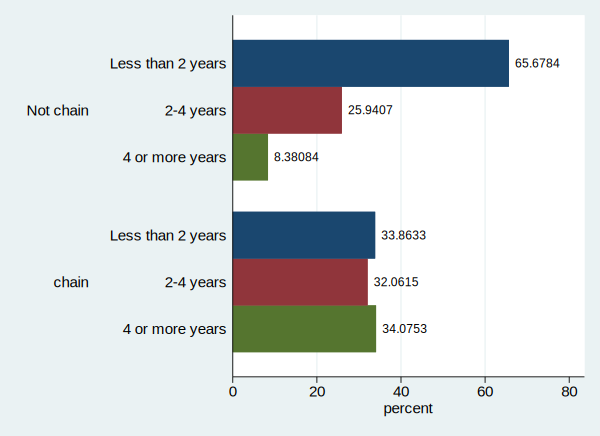

In [17]:
graph hbar _Ilevel_*, over(chain) label percentages legend(off) blabel(bar) showyvars yvaroptions(relabel(1 "Less than 2 years" 2 "2-4 years" 3 "4 or more years"))

In [18]:
tab chain owner_pe2, column chi


+-------------------+
| Key               |
|-------------------|
|     frequency     |
| column percentage |
+-------------------+

           |            owner_pe2
     chain | Private e  Privately  Publicly  |     Total
-----------+---------------------------------+----------
 Not chain |        29      1,721          4 |     1,754 
           |      5.25      79.42       0.43 |     48.17 
-----------+---------------------------------+----------
     chain |       523        446        918 |     1,887 
           |     94.75      20.58      99.57 |     51.83 
-----------+---------------------------------+----------
     Total |       552      2,167        922 |     3,641 
           |    100.00     100.00     100.00 |    100.00 

          Pearson chi2(2) =  2.1e+03   Pr = 0.000


In [19]:
xi i.chain, noomit

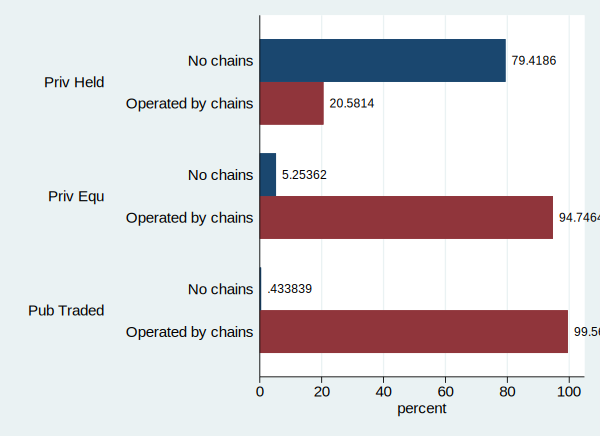

In [20]:
graph hbar _Ichain_*, over(owner_pe3) label percentages legend(off) blabel(bar) showyvars yvaroptions(relabel(1 "No chains" 2 "Operated by chains"))

### 10. Lastly, use **chain ownership** or the relevant variable for your own data as a control variable by 1) adding the specification "bysort ~~iclevel~~ owner_pe:" before the "tab command" and 2) adding a "by(~~iclevel~~ owner_pe)" specification to the end of the graph command. Interpret the results [5 pts]

[YOUR INTERPRETATION HERE]

Controlling for chain operations as an intervening variable does not reduce the effect on degree level offered of ownership for chains. It actually strengthens the effect on degree level of ownership for non-chains, meaning it is both an intervening control variable and an interaction control variable.

In [21]:
bysort chain: tab level owner_pe3, col


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
-> chain = Not chain

+-------------------+
| Key               |
|-------------------|
|     frequency     |
| column percentage |
+-------------------+

        RECODE of |       RECODE of owner_pe2
         iclevel2 | Priv Held   Priv Equ  Pub Trade |     Total
------------------+---------------------------------+----------
Less than 2 years |     1,148          4          0 |     1,152 
                  |     66.71      13.79       0.00 |     65.68 
------------------+---------------------------------+----------
        2-4 years |       444         11          0 |       455 
                  |     25.80      37.93       0.00 |     25.94 
------------------+---------------------------------+----------
  4 or more years |       

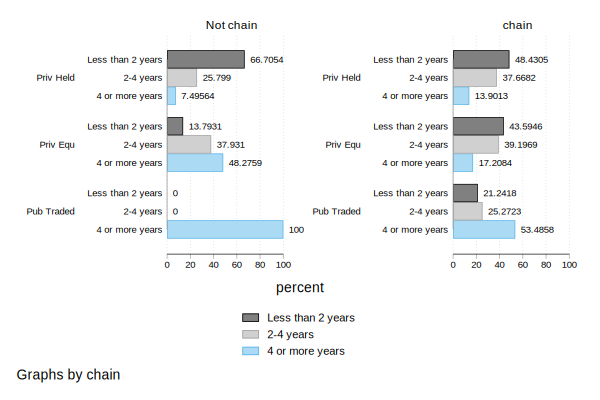

In [24]:
xi i.level, noomit
graph hbar _Ilevel_*, schem(plotplainblind) over(owner_pe3) label percentages legend(off) blabel(bar) showyvars yvaroptions(relabel(1 "Less than 2 years" 2 "2-4 years" 3 "4 or more years")) by(chain)